# UP902897

# M131 Computational Mathematics Coursework 
# Deadline 5th April 17:00

### Please select the line below and press __Shift+Enter__

In [1]:
import numpy as np #contains a lot of maths functions that we will use
import pandas as pd # handling data 
from scipy import stats
import matplotlib.pyplot as plt #plotting package
from ipywidgets import interact, interactive, fixed #interactivity

# Problem 1 (30 marks)

a) (2 marks)

In the cell below please define the following function
$$ f(x) =e^x + \ln(x).$$

In [2]:
def f(x):#input x= any numerical value
        return np.exp(x)+np.log(x)#output:e^x+ln(x)
print (f(1),f(5))#test for x=1 and x=5,prints values of f for xs

2.71828182846 150.022597015


b) (3 marks)

Plot the graph of $f$ in the range $[1, 5]$. 

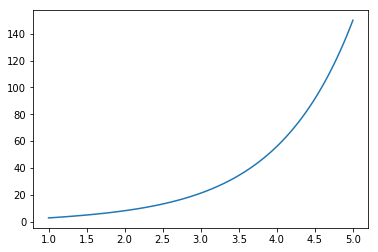

In [3]:
arguments = np.linspace(1, 5, 100) #defines the list of arguments that will be applied to the function
values = f(arguments) # set of values of the function, after each argument from arguments has been evaluated by it. 
plt.plot(arguments, values) # plotting function, requires two inputs: arguments and set of values
plt.show() # this a standard line used to display the plot properly

c) (10 marks)

Now construct a Lagrange Polynomial that approximates the above $f$ given $3$ data points
$$ (1, f(1)), (3, f(3)),  (5, f(5)).$$
Do it with pen and paper and then define it in the cell below, call it __lag_f__. It should have only one input $x$.

In [4]:
def lag_f(x):
    return (x*2-8*x+15)*(f(1)/8)+(x**2-6*x+5)*(f(3)/-4)+(x**2-4*x+3)*(f(5)/8)
print (lag_f(1),lag_f(5))

3.05806705702 144.925818587


d) (5 marks)

In the cell below plot functions $f$ and __lag_f__ in the same graph.  

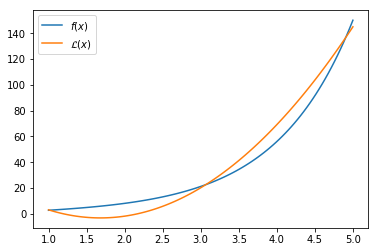

In [5]:
arguments = np.linspace(1, 5, 100)#first argument, last argument,and number of arguments 
values_f = f(arguments)
values_lag_f = lag_f(arguments)
plt.plot(arguments, values_f,label = "$f(x)$")#plots arguments against f values,label to f(x)
plt.plot(arguments, values_lag_f,label = "$\mathcal{L}(x)$")#plots arguments against lag f values,label to Lagrange approximation
plt.legend()#displays the legend 
plt.show()

e) (10 marks)

By using Simpson's rule approximate the following error areas
$$ \int_1^3 \left(f(x) - \mathcal{L}(x)\right) \mathrm{d}x + \int_3^5 \left( \mathcal{L}(x) - f(x) \right) \mathrm{d}x,$$
where $\mathcal{L}$ is the Lagrange interpolation polynomial that you defined earlier as __lag_f__. 
You may want to use the code for Simpson's rule from the labs. Please print your results. 

In [6]:
def simpsons(a,b,n):#a,b are integral limits, n= number of steps  
    h = (b-a)/n #defines step
    total = abs(f(a)-lag_f(a))#f(x0)-L(x0)
    for k in range(1, n):# k ranges from 1 to n-1
        a += h #a increased by a step
        if k%2==0: #even (f(x2)-L(x2)...
            total += 2*(abs(f(a)-lag_f(a)))
        else: # not even f(x1)-L(x1)...
            total += 4*(abs(f(a)-lag_f(a)))
            
    total = total + abs(f(b)-lag_f(b))#f(xn)-L(xn)
    return h/3*total 
print (simpsons(1,5,10000))#more steps, greater accuracy
#have used absolute value, as I think it gives better approximation of error areas and it can be done at once.
#Below it is splitted into two approximations and added together

29.9922675568


In [7]:
def simpsons1(a,b,n):  
    h = (b-a)/n 
    total =(f(a)-lag_f(a)) 
    for k in range(1, n):
        a += h 
        if k%2==0: 
            total += 2*(f(a)-lag_f(a))
        else: 
            total += 4*((f(a)-lag_f(a)))
            
    total = total + (f(b)-lag_f(b))
    return h/3*total 
print (simpsons1(1,3,10000))

13.3826144761


In [8]:
def simpsons2(a,b,n):  
    h = (b-a)/n 
    total =-(f(a)-lag_f(a))
    for k in range(1, n):
        a += h 
        if k%2==0: 
            total += 2*-(f(a)-lag_f(a))
        else: 
            total += 4*-((f(a)-lag_f(a)))
            
    total = total-(f(b)-lag_f(b))
    return h/3*total 
print (simpsons2(3,5,10000)+simpsons1(1,3,10000))

29.4518686148


# Problem 2 (35 marks)

a) (10 marks)

Let $D$ be a given function and $D_h$, $h >0$, be its approximation on the interval $[a, b]$ for $-\infty<a<b<\infty$. Also assume that there exists $n \in \mathbb{N}$ such that the approximation error is $D(x) - D_h(x) = O(h^n)$ as $h \to 0$ for all $x \in [a, b]$.

In the cell below write a function __rich_extrapol__ that implements Richardson extrapolation formula
$$ R(x, h, k) = \frac{k^nD_h(x) - D_{kh}(x)}{k^n - 1},$$
where $x \in [a, b]$, $h>0$, $k>1$.

Your function should have the following inputs
- x, a float, 
- h, a float (small number), 
- k, an integer, 
- Dh, a function of x and h (to allow you getting $D_h$ and $D_{kh}$),
- n, an integer such that $D(x) - D_h(x) = O(h^n)$ as $h \to 0$.

In [9]:
def rich_extrapol(x,h,k,Dh,n):
    kh=k*h#for Dkh h is multiplied by k
    Dkh=Dh(x,kh)#same function, different variable
    return (k**n*Dh(x,h)-Dkh)/(k**n-1) 

b) (6 marks)

In the cell below, define $g(x) = \sin(xe^x)$, also find its derivative (with pen and paper) and define it as __dev_g__.  

In [10]:
def g(x):
    return np.sin(x*np.exp(x))
def dev_g(x):
    return np.cos(x*np.exp(x))*(np.exp(x)+x*np.exp(x))
x=0
print(g(x),dev_g(x))

0.0 1.0


c) (4 marks)

In the cell below, define a function __num_diff__ with 3 inputs
- f, a function, 
- x, a float,
- h, a float (small number), 

that returns 
$$ \frac{f(x+h)- f(x-h)}{2h}.$$


In [11]:
def num_diff(f,x,h):
    return (f(x+h)-f(x-h))/(2*h)
print (num_diff(g,0,0.1))

1.00326287664


d) (15 marks)

We will be approximating $g^{\prime}(x)$ by $R(x, h, k)$, where
$$D(x) = g^{\prime}(x) \mbox{ and } D_h(x) =  \frac{g(x+h)- g(x-h)}{2h}.$$

Plot both functions $g^{\prime}(x)$ and $R(x, h, k)$ in the same graph, make the plot interactive with respect to $h$ and $k$;
- make your x-axis to range between $1$ and $3$, 
- your $h$ should takes values from $0.01$ to $0.1$ with increment $0.01$,
- your $k$ should take values from $2$ to $10$ with increment $1$.

In [12]:
n=2 #error is O(h^2) as h tends to zero

def Dh(x,h):#num_diff function with g function as an input
    return num_diff(g,x,h)

def D(x):#does not need to be here, dev_g will be used instead
    return dev_g(x)

In [13]:
def int_graphs(h,k):
    arguments=np.linspace(1,3,1000)
    plt.plot(arguments,dev_g(arguments),label="$g\prime(x)$")
    R_vals=[rich_extrapol(item,h,k,Dh,n)for item in arguments]#list of values for R evaluated at every argument
    plt.plot(arguments,R_vals,label="R(x,h,k)")
    plt.legend()
    plt.show()
vals_h = (0.01,0.1,0.01)#range of values for h with increment
vals_k = (2,10,1)#range of values for k with increment
interactive_plot = interactive(int_graphs,h=vals_h,k=vals_k)
interactive_plot

# sometimes slider for k does not change the graph of R at all, not sure why

# Problem 3 (35 marks)

There are $n \in \mathbb{N}$ houses on the Elm Grove street. 

### Police 
Police officer is pursuing a suspect, however due to limited resources only certain time $N$ (number of steps) can be dedicated to this pursuit.  Police officer is performing the following simple random walk taking $N$ steps:
$$X_{k +1} = \begin{cases}X_k + 1  \ ( \! \! \mod n) &\mbox{ with probability } p \\ X_{k} - 1 \ (\! \! \mod n) &\mbox{ with probability } 1-p  \end{cases}$$
given that $X_0 = 0$, for $k \in \{0, \ldots, N-1\}$. When officer lands at node (house) $k$ he automatically performs a search and if the suspect is at the same location (house) then the pursuit ends. 

### Suspect
The suspect is trying to run away, he performs the following simple random walk 
$$Y_{k +1} = \begin{cases}Y_k + 1  \ ( \! \! \mod n) &\mbox{ with probability } q \\ X_{k} - 1 \ (\! \! \mod n) &\mbox{ with probability } 1-q  \end{cases}$$
given that $Y_0 = n-1$, for $k \in \{0, \ldots, N-1\}$.
If the suspect and police officer meet at the same location at some time $k$, the suspect is immediately arrested and the pursuit ends. 

a) (10 marks)

In the cell below please write a function __random_walk__ that performs the above random walk (either one is good, we will have an initial position of the walk,$X_0$ or $Y_0$, as an input) and has the following inputs
- start, an integer, the initial position of the walker, 
- n, an integer, 
- N, an integer, 
- prob, a float that represents a probability (e.g. either $p$ or $q$).

Your function should return a list of $N$ elements that represents the houses visited by either police office or a suspect during the time $N$ (number of steps in a walk). 

In [14]:
def random_walk(start,n,N,prob):
    Y0=start # initial position of the walker(X0 or Y0)
    Yk=Y0
    houses=[]# empty list, no N steps done
    for k in range(1,N+1):# to make it more clear, Y1,Y2,...,Yn (N steps)
        step = np.random.choice([-1, 1], p=[1-prob, prob])#list [-1,1] and probabilities for elements of this list
        Yk+=step 
        Yk=Yk%n # Considering houses from 0 to n-1, number can`t be greater than number of houses on the street or negative 
                # It leaves the remainder from division Yk by n (Yk (mod n)).
                #In Python % always return a number having the same sign as the divisor. Therefore, no other conditions.
        houses.append(Yk)# adds element(house visited) to the list
    return houses #returns the list

In [15]:
print (random_walk(0,10,20,0.5))

[9, 8, 7, 6, 5, 4, 5, 4, 5, 6, 5, 6, 7, 6, 7, 8, 9, 0, 1, 2]


b) (5 marks)

By using the above __random_walk__ function produce two graphs, an example of the walks by the officer and the suspect. 
Choose $n = 10$, $N = 100$, $p = 0.75$, $q = 0.25$.

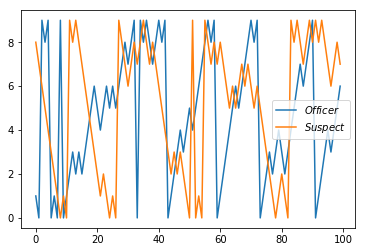

In [16]:
n=10       
N=100
prob=0.25
start=n-1 
x_vals = np.arange(N) #sequence of N evenly spaced values from 0 to N-1, stored as an array object.
values_pol = random_walk(n,n,N,1-prob)# list of houses visited by the officer.(n(mod n)=0,X0=0)
values_sus = random_walk(start,n,N,prob)# list of houses visited by the suspect.
plt.plot(x_vals, values_pol,label = "$Officer$")
plt.plot(x_vals, values_sus,label = "$Suspect$")
plt.legend() 
plt.show()

c) (10 marks)

In the cell below please write a function __prison_or_freedom__ that has the following inputs, 
- n, an integer, the number of houses.
- N, an integer, the maximum number of steps.
- p, a float, a probability for the officer.
- q, a float, a probability for the suspect.

In your function you should create two lists, officer's and suspect's walk by using __random_walk__ function. If at any time (index) $k \in \{0, \ldots, N-1\}$, the values of these list at $k$ are the same you should return $1$ (immediately breaking the loop) and $0$ if for all $k$ the values (of these lists at $k$) are different. 

In [17]:
def prison_or_freedom(n,N,p,q):
    police=random_walk(n,n,N,p)# n(mod n)=0, starting position for officer
    suspect=random_walk(n-1,n,N,q)
    for k in range (N): #k ranges from 0 to N-1
        if police[k]==suspect[k]:# if they are both in the same house at the same time (k)
            return 1 # returns 1 
            break # breaks the loop
    return 0 # returns 0, unless the above condition was satisfied
        
print (prison_or_freedom(9,100,0.75,0.25),prison_or_freedom(10,100,0.75,0.25))
# suspect will never get cought when the number of houses(n) is even, no matter the resources, I like the idea :)    

1 0


d) (10 marks)

In the cell below write a function __exper_prob__ that has 4 inputs
- M, an integer, number of trials,
- n, an integer, the number of houses, 
- N, an integer, the maximum number of steps,
- p, a float, a probability for the officer,
- q, a float, a probability for the suspect.

This function should perform $M \in \mathbb{N}$ (a big number e.g. $M= 1000$) experiments of the __prison_or_freedom__ function, and make a record of each experiment by assigning the value returned by __prison_or_freedom__ to a list. Use this list to find an approximate probability that a suspect is caught in $N$ searches. Your function should return this probability. 

Print the obtained probability for the following inputs
- fix $n$ to be 11 times the last digit of your Student ID plus seven, that is, $ 11 \cdot (\mbox{last digit} + 7). $  
- fix $N$ to be first 2 digits of your Student ID number, 
- set $M = 1000$, 
- $p=0.75$,
- $q=0.25$.

In [18]:
def exper_prob(M,n,N,p,q):
    experiments=[]
    for k in range (M):
        experiments.append(prison_or_freedom(n,N,p,q))
    caught=0
    for item in experiments:
        caught+=item
    probability=caught/M
    return probability

In [19]:
student_number=[9,0,2,8,9,7]
n=11*(student_number[-1]+7)
N=10*student_number[0]+student_number[1]
M=1000
p=0.75
q=0.25

print (N,n,exper_prob(M,n,N,p,q))

90 154 0.0


In [20]:
# In my case it is definitely freedom, suspect will never get cought because even number of houses,
# suspect will be always in 'odd' house, officer in 'even' house. 
# Even if I change the number of houses to 'odd' by adding/removing 1, it is impossible they will meet, 
# because number of houses is greater than number of steps and difference between them is too big(considering probs).